<center>
<font color="#F18111" size="7"><b>TRANSFER LEARNING</b></font>
<br>
<img src="https://cdn-images-1.medium.com/max/1000/1*zUATaXMAmKof27rPyBRWsg.png">
</center>

<font size="6" color="#0DB67B"><b>VGG-16 (Visual Geometry Group)</b></font>
<p>Is a convolutional neural network (CNN). It was presented in <a href="https://arxiv.org/abs/1409.1556">Very Deep Convolutional Networks for Large-Scale Image Recognition</a>. Achieves 92.7% top-5 test accuracy in ImageNet (14 million images belonging to 1000 clases).</p>
<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

https://neurohive.io/en/popular-networks/vgg16/

https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [0]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.cluster import KMeans
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'
# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# \ para ponerle espacio o 'el texto' si no quieres el \
ls -l drive/

total 4
drwx------ 19 root root 4096 Feb 15 15:07 'My Drive'/


In [4]:
ls -l drive/My\ Drive/'2019-2 #CICLO_10♥'

total 24
drwx------ 2 root root 4096 Aug 31 19:48 'BIG DATA'/
drwx------ 2 root root 4096 Sep 10 01:25 'INFORMATION TECNOLOGY MANAGEMENT'/
drwx------ 2 root root 4096 Sep 20 21:20 'MINERÍA DE DATOS AVANZADO'/
drwx------ 2 root root 4096 Nov  7 22:06  MODELOS/
drwx------ 2 root root 4096 Sep 14 22:18 'TEORIA GENERAL DE LOS SISTEMAS'/
drwx------ 2 root root 4096 Jan 21 13:29 'TESIS 2'/


In [5]:
directorio = 'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'
directorio

'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'

In [6]:
num_imagenes = 10350
num_imagenes

10350

### CREANDO EL DATA SET

In [6]:
carpeta_fotos = []
for i in os.listdir(directorio):
    #print(i[0])
    if i[0:6] != ".ipynb" and i[-6::]!=".ipynb"  and i[-5::]!=".xlsx" and i =="IMAGENES_TESIS":
        carpeta_fotos.append(i)
carpeta_fotos

['IMAGENES_TESIS']

In [7]:
directorio1 = 'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'
directorio1

'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/'

In [0]:
a = "tabla_final.xlsx"
b = os.path.join(directorio1,a)
y = pd.read_excel(b)
#y.head()
y_total = y[["Y"]]
y_total.head()

,Y
0,Yes
1,No
2,Yes
3,No
4,No


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y_total,y_total,test_size = 0.3, random_state = 42)

In [0]:
len(X_train)

7245

In [0]:
index_train = []
type(index_train)
for i in X_train.index:
  index_train.append(i)
index_train[0:10]

[6240, 8610, 4038, 7139, 5960, 1701, 3145, 2526, 6480, 68]

In [0]:
len(index_train)

7245

In [0]:
index_test = []
for i in X_test.index:
  index_test.append(i)
index_test[0:10]

[10295, 7747, 8553, 7191, 500, 8109, 3777, 3885, 3721, 119]

In [0]:
len(index_test)

3105

In [0]:
yes_index_train = []
no_index_train = []
for i in index_train:
  if y_total['Y'][i] == "Yes":
    yes_index_train.append(i)
  else:
    no_index_train.append(i)
print(len(yes_index_train))
print(len(no_index_train))

4425
2820


In [0]:
yes_index_test = []
no_index_test= []
for i in index_test:
  if y_total['Y'][i] == "Yes":
    yes_index_test.append(i)
  else:
    no_index_test.append(i)
print(len(yes_index_test))
print(len(no_index_test))

1864
1241


In [0]:
directorio
carpeta_fotos[0]

'IMAGENES_TESIS'

## CLASE SI

In [0]:
conta = 0
#TRAIN
for i in yes_index_train:
  imagen_nom = str(i)+"_img.jpg"
  src_y = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  image = cv2.imread(src_y)
  dst_y = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TRAIN','YES',imagen_nom)
  print(dst_y)
  cv2.imwrite(dst_y,image)
#TEST
for i in yes_index_test:
  imagen_nom = str(i)+"_img.jpg"
  src_y = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  image = cv2.imread(src_y)
  dst_y = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TEST','YES',imagen_nom)
  print(str(conta)+" " + str(dst_y))
  cv2.imwrite(dst_y,image)
  conta = conta + 1

"""#VAL
for i in range(3600,4000):
  imagen_nom = str(yes_index[i])+"_img.jpg"
  src_y = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  image = cv2.imread(src_y)
  dst_y = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','VALIDATION','YES',imagen_nom)
  cv2.imwrite(dst_y,image)
"""
cv2.destroyAllWindows()

drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/6240_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/4038_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/5960_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/3145_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/2526_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/6480_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/48_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/2651_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/2439_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/4030_img.jpg
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/YES/602

## CLASE NO

In [0]:
#TRAIN
%%time
conta = 1570
"""for i in no_index_train:
  imagen_nom = str(i)+"_img.jpg"
  src_n = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  image = cv2.imread(src_n)
  dst_n = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TRAIN','NO',imagen_nom)
  cv2.imwrite(dst_n,image)
  conta = conta + 1
  print(str(i)+" " + str(dst_n))"""
for i in range(1570,len(no_index_train)):
  imagen_nom = str(no_index_train[i])+"_img.jpg"
  src_n = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  image = cv2.imread(src_n)
  dst_n = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TRAIN','NO',imagen_nom)
  cv2.imwrite(dst_n,image)
  print(str(conta)+" " + str(dst_n))
  conta = conta + 1

#TEST
for i in no_index_test:
  imagen_nom = str(i)+"_img.jpg"
  src_n = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  image = cv2.imread(src_n)
  dst_n = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TEST','NO',imagen_nom)
  cv2.imwrite(dst_n,image)
  print(str(conta)+" " + str(dst_n))
  conta = conta + 1

#VAL
"""
for i in range(3600,4000):
  imagen_nom = str(no_index[i])+"_img.jpg"
  src_n = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  image = cv2.imread(src_n)
  dst_n = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','VALIDATION','NO',imagen_nom)
  cv2.imwrite(dst_n,image)
  print(i)"""

cv2.destroyAllWindows()

1570 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/1307_img.jpg
1571 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/998_img.jpg
1572 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/9904_img.jpg
1573 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/1237_img.jpg
1574 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/10034_img.jpg
1575 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/7727_img.jpg
1576 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/9945_img.jpg
1577 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/1134_img.jpg
1578 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/1303_img.jpg
1579 drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/VGG_ENTRADAS/TRAIN/NO/8760_img.jpg
1580 drive/My Drive/2019-2 #CICLO_10♥/TE

In [0]:
len(no_index_train)

2820

In [0]:
no_index_train.index(9945)

1576

## **Load Dataset**

## **TRAIN | VAL | TEST**

In [7]:
train_yes = os.listdir(os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TRAIN','YES'))
train_no  = os.listdir(os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TRAIN','NO'))

test_yes = os.listdir(os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TEST','YES'))
test_no= os.listdir(os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TEST','NO'))
"""
val_yes = os.listdir(os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','VALIDATION','YES'))
val_no = os.listdir(os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','VALIDATION','NO'))
"""

len(train_yes), len(train_no), len(test_yes), len(test_no) #, len(val_yes), len(val_no)

(4425, 2820, 1864, 1241)

In [8]:
len(train_yes)+ len(train_no)+len(test_yes)+ len(test_no)

10350

### **Data Augmentation**

In [9]:
## process image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
"""ImageDataGenerator(featurewise_center=False, 
                   samplewise_center=False, 
                   featurewise_std_normalization=False,
                   samplewise_std_normalization=False,
                   zca_whitening=False, zca_epsilon=1e-06, 
                   rotation_range=0, width_shift_range=0.0,
                   height_shift_range=0.0,
                   brightness_range=None, shear_range=0.0, 
                   zoom_range=0.0, channel_shift_range=0.0, 
                   fill_mode='nearest', cval=0.0,
                   horizontal_flip=False, vertical_flip=False,
                   rescale=None, preprocessing_function=None, 
                   data_format='channels_last', 
                   validation_split=0.0, interpolation_order=1,
                   dtype='float32')"""


#width_shift_range=0.2,
#height_shift_range=0.2,
#zoom_range:  flotante o [inferior, superior]. Rango para zoom aleatorio. 
#             Si un flotador, [lower, upper] = [1-zoom_range, 1+zoom_range].

## train data augmentation 
#rescale: Crea nuevas imagenes de 0 a 1,  
#horizontal_flipy: Voltear aleat. las entradas horizontalmente
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
"""
## val data augmentation
val_datagen = ImageDataGenerator(rescale=1./255,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)"""

## test data augmentation
test_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [11]:
## read train data
#directory: Cadena, ruta al directorio de destino. Conteniendo un subdirectorio por clase.
#target_size: tupla de num. enteros. #redimensionar todas las imagenes encontradas
#color_mode:Uno de "escala de grises", "rgb", "rgba". Valor predeterminado: "rgb". Si las imágenes se convertirán para tener 1, 3 o 4 canales.
#batch_size: tamaño de bloques de imagenes: 32
#class_mode: binary - Matriz numpy 1D de etiquetas binarias,
#shuffle:mezclar los datos
train_generator = train_datagen.flow_from_directory(directory=os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TRAIN'),
                                                    target_size=(224,224),
                                                    color_mode="rgb", 
                                                    batch_size=32,  
                                                    class_mode="binary", ## categorical
                                                    shuffle=True) 

"""## read val data
val_generator = val_datagen.flow_from_directory(directory=os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','VALIDATION'),
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                batch_size=32,
                                                class_mode="binary", ## categorical
                                                shuffle=True) #aleatorio
"""
## read test data
test_generator = test_datagen.flow_from_directory(directory=os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','TEST'),
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                batch_size=32,
                                                class_mode="binary", ## categorical
                                                shuffle=True)

Found 7245 images belonging to 2 classes.
Found 3105 images belonging to 2 classes.


## **Load VGG-16 Model**

In [0]:
## traditional libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## architecture CNN
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

## transfer learning
from keras.applications import VGG16

In [0]:
#el kernel es mi bios, mis pesos, ya declarados en imagenet

In [13]:
#include_top: False- No vamos a incluir una red neuronal densa al final, solo llamamos hasta el maxpooling
#weights="imagenet": Cargando los pesos de un modelo entrenado apriori "imagenet"
#input_shape:Forma de los datos de la entrada
# load the base model of VGG-16 without the last layer
base_model = VGG16(weights="imagenet",
                   include_top=False,
                   input_shape = (224, 224, 3))

## architecture summary
base_model.summary() ## 64 * 9 * 3 + 64





58892288/58889256 [==============================] - 1s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________

In [0]:
#tiene 14 714 688 pesos

In [14]:
 base_model.input

<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>

In [15]:
 base_model.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(?, 7, 7, 512) dtype=float32>

In [16]:
#Flatten: es llevar de una matriz a un vector, para el dense
#Dropout: corre de 0 a 1, conjunto de redes, y no correr todas las redes, por ejemplo si le pongo 0.5, solo usa la mitad de las redes
#Dense, es para declarar las neuronas, donde entrara mis entradas

## add custom layers
X = base_model.output
X = Flatten()(X) # 250,088
X = Dense(1024, activation="relu")(X) # + 1,024  #1 capa  
X = Dropout(rate=0.5)(X) 
X = Dense(1024, activation="relu")(X) # + 1,024 #dos capas 

## add the last layer with softmax activation for 3 classes
# output = Dense(3, activation="softmax")(X) ## for categorical
#3 capas
output = Dense(1, activation='sigmoid')(X) ## for binary ... softmax para 2 o mas categorias de respuesta #4 capas

## build the model
model = Model(input = base_model.input, output = output)

## freeze:
## the vgg layers
## the first 10 layers
## not all
for layer in model.layers[:]:  # layer in model.layers[:-5]:  es para darle cuantos pesos quiero usar de mi vgg
    layer.trainable = True
#.getweighth
## architecture summary
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

## **Train VGG-16**

In [17]:
train_generator.n

7245

In [18]:
train_generator.batch_size 

32

In [19]:
## get the number of image by each batch
step_size_train = train_generator.n // train_generator.batch_size 
#step_validation_steps = test_generator.n // test_generator.batch_size
print(step_size_train)#, print(step_validation_steps)

226


In [20]:
## compile the model
# model.compile(optimizer = optimizers.SGD(lr=0.001, momentum=0.7),
#               loss = "categorical_crossentropy",
#               metrics = ["accuracy"])
model.compile(optimizer= optimizers.SGD(lr=0.001, momentum=0.9),
              loss='binary_crossentropy', #porque solo tenemos 2 categoria, sofmax seria para mas categorias
              metrics=['accuracy'])

## get the number of image by each batch
step_size_train = train_generator.n // train_generator.batch_size 
step_validation_steps = test_generator.n // test_generator.batch_size



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
## train the model
model.fit_generator(generator = train_generator,
                    steps_per_epoch = 32, 
                    epochs = 50)


#32 pasos
#, #cuantas idas  y vueltas, 20 veces
                    #validation_data = val_generator, #esto no
                    #validation_steps = 32) # no



Epoch 1/50
32/32 [==============================] - 517s 16s/step - loss: 0.7075 - acc: 0.5723
Epoch 2/50
32/32 [==============================] - 501s 16s/step - loss: 0.6393 - acc: 0.6445
Epoch 3/50
32/32 [==============================] - 510s 16s/step - loss: 0.6122 - acc: 0.6572
Epoch 4/50
32/32 [==============================] - 515s 16s/step - loss: 0.5321 - acc: 0.7373
Epoch 5/50
32/32 [==============================] - 517s 16s/step - loss: 0.5331 - acc: 0.7314
Epoch 6/50
32/32 [==============================] - 520s 16s/step - loss: 0.5559 - acc: 0.7109
Epoch 7/50
32/32 [==============================] - 506s 16s/step - loss: 0.5429 - acc: 0.7197
Epoch 8/50
32/32 [==============================] - 71s 2s/step - loss: 0.4956 - acc: 0.7793
Epoch 9/50
32/32 [==============================] - 27s 841ms/step - loss: 0.5016 - acc: 0.7494
Epoch 10/50
32/32 [==============================] - 27s 858ms/step - loss: 0.4891 - acc: 0.7568
Epoch 11/50
32/32 [============================

In [0]:
## train the model
#!pip install livelossplot
# from livelossplot import PlotLossesKeras

# model.fit_generator(generator = train_generator,
#                     steps_per_epoch = step_size_train,
#                     epochs = 100,
#                     validation_data = val_generator,
#                     validation_steps = 10,
#                     verbose = 0,
#                     callbacks=[PlotLossesKeras()])

### **Plot accuracy | loss**

In [0]:
plt.style.use('ggplot')
def show_training(model):   
    # summarize history for accuracy
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    ## history for the accuracy
    ax1.plot(model.history.history['acc'], color="blue")
    #ax1.plot(model.history.history['val_acc'], color="orange")
    ax1.set_title("Model Accuracy")
    ax1.set_ylabel("accuracy")
    ax1.set_xlabel("epoch")
    #ax1.legend(["train", "validation"])
    ax1.legend(["train"])

    ## history for the loss
    ax2.plot(model.history.history['loss'], color="blue")
    #ax2.plot(model.history.history['val_loss'], color="orange")
    ax2.set_title("Model Loss")
    ax2.set_ylabel("loss")
    ax2.set_xlabel("epoch")
    #ax2.legend(["train", "validation"])
    ax2.legend(["train"])



    
    plt.show()

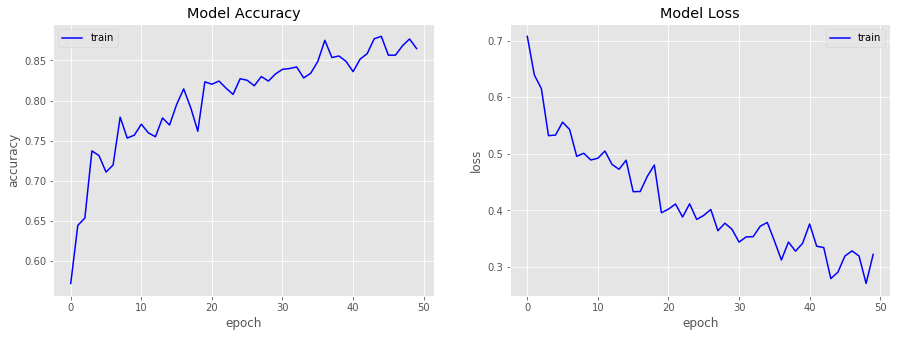

In [0]:
### plot model (only 5 last layers trainable)
show_training(model)

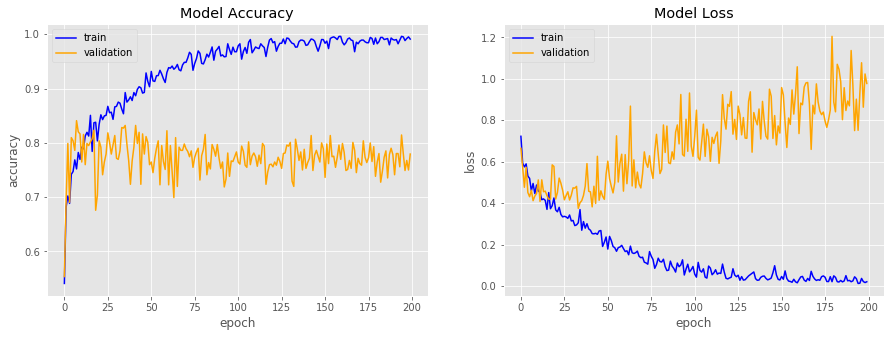

In [0]:
### plot model (only 5 last layers trainable)
show_training(model)

## **Test**

In [0]:
## evaluate the model
model.evaluate_generator(test_generator, steps = 32) # [0.39230306120589375, 0.8486328125]

[0.39230306120589375, 0.8486328125]

In [0]:
ad = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','model_vgg16_v1_Real.h5')
model.save(ad)

## **Deploy**

In [0]:
import cv2
from skimage import io
from keras.models import load_model

In [27]:
## load the model
ad = os.path.join(directorio,'MODELOS_2','VGG_ENTRADAS','model_vgg16_v1_Real.h5')
predictor_vgg16 = load_model(ad)
predictor_vgg16

In [28]:
predictor_vgg16.evaluate_generator(test_generator, steps = 32) # [0.39230306120589375, 0.8486328125]

[0.4413305683992803, 0.814453125]

In [0]:
## index classes
train_generator.class_indices

{'NO': 0, 'YES': 1}

In [0]:
print(len(yes_index_test))
print(len(no_index_test))

1864
1241


In [0]:
for i in range(0, 100):
    categories = ["YES", "NO"]
    imagen_nom = str(yes_index_test[i])+"_img.jpg"
    src_y = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
    img = io.imread(src_y)

    ## read the images
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ## BGR to RGB
    img = cv2.resize(img, (224, 224)) ## resize
    img = img/255.0 ## scale
    img = img.reshape(-1, 224, 224, 3) ## reshape

    ## do classification
    preds = predictor_vgg16.predict(img)
    preds
    clasi = 'Yes'
    if preds <0.5:
      clasi = 'No'
    print(src_y, " - Prediccion: " , str(preds), " Rpta:", clasi)
    print("-----------------------------------")

drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/10295_img.jpg  - Prediccion:  [[0.99869317]]  Rpta: Yes
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/8553_img.jpg  - Prediccion:  [[0.9624513]]  Rpta: Yes
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/500_img.jpg  - Prediccion:  [[0.8406101]]  Rpta: Yes
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/8109_img.jpg  - Prediccion:  [[0.6200159]]  Rpta: Yes
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/3777_img.jpg  - Prediccion:  [[0.9967907]]  Rpta: Yes
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/3885_img.jpg  - Prediccion:  [[0.99831474]]  Rpta: Yes
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/3721_img.jpg  - Prediccion:  [[

In [0]:
no_index[4010]

10103

In [0]:
for i in range(0, 100):
  categories = ["YES", "NO"]
  imagen_nom = str(no_index_test[i])+"_img.jpg"
  src_n = os.path.join(directorio,carpeta_fotos[0],imagen_nom)
  img = io.imread(src_n)

  ## read the images
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ## BGR to RGB
  img = cv2.resize(img, (224, 224)) ## resize
  img = img/255.0 ## scale
  img = img.reshape(-1, 224, 224, 3) ## reshape

  ## do classification
  preds = predictor_vgg16.predict(img)
  preds
  clasi = 'Yes'
  if preds <0.5:
    clasi = 'No'
  print(src_n, " - Prediccion: " , str(preds), " Rpta:", clasi)   
  print("-----------------------------------")

drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/7747_img.jpg  - Prediccion:  [[0.08208847]]  Rpta: No
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/7191_img.jpg  - Prediccion:  [[0.22366995]]  Rpta: No
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/119_img.jpg  - Prediccion:  [[0.01255265]]  Rpta: No
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/7108_img.jpg  - Prediccion:  [[2.255501e-06]]  Rpta: No
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/5137_img.jpg  - Prediccion:  [[0.19870873]]  Rpta: No
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/8005_img.jpg  - Prediccion:  [[0.83275473]]  Rpta: Yes
-----------------------------------
drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/IMAGENES_TESIS/35_img.jpg  - Prediccion:  [[0.